In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


#import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


#import metric
from sklearn.metrics import r2_score

In [5]:
#read train and test
train_df=pd.read_csv(os.path.join(os.getcwd(),'train.csv'))

In [6]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
#show nulls
train_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
print(train_df.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [9]:
#change datetime[table] to type datetime in pandas to handle it

train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [10]:
#for train 
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['hour'] = train_df['datetime'].dt.hour
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,22


In [11]:
#drop umwanted colums after extract specific feature
train_df.drop(columns=['datetime'],axis=1,inplace=True)
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,22


In [12]:
print(train_df.dtypes)

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int32
month           int32
hour            int32
dtype: object


In [13]:
#reorder columns (optinal)

cols = train_df.columns.tolist()  
desired_cols = ['year', 'month','hour']   
		
# Create new DataFrame with desired column order
new_cols = desired_cols + [col for col in cols if col not in desired_cols]
train_df = train_df[new_cols]
train_df

,year,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011,1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011,1,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011,1,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011,1,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012,12,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012,12,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012,12,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [14]:
train_df.describe()

,year,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011.501929,6.521495,11.541613,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,0.500019,3.444373,6.915838,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,2011.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,4.000000,6.000000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012.000000,7.000000,12.000000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012.000000,10.000000,18.000000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012.000000,12.000000,23.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [15]:
train_df.corr()['count']

year          0.260403
month         0.166862
hour          0.400601
season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [16]:
#convert hours from ot 0 --> 23 to specific period

def custom_hours(hours):
    if 6 <= hours <12:
        return 'morning'
    elif 12 <= hours < 18:
        return 'afternoon'
    elif 18 <= hours < 23:
        return 'night'
    else :
        return 'overnight'

train_df['custom_hour']=train_df['hour'].apply(custom_hours)
train_df

C:\Users\2B'\AppData\Local\Temp\ipykernel_11652\321175246.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['custom_hour']=train_df['hour'].apply(custom_hours)


,year,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,custom_hour
0,2011,1,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,overnight
1,2011,1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,overnight
2,2011,1,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,overnight
3,2011,1,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,overnight
4,2011,1,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,overnight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,night
10882,2012,12,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,night
10883,2012,12,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,night
10884,2012,12,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,night


#### visualization

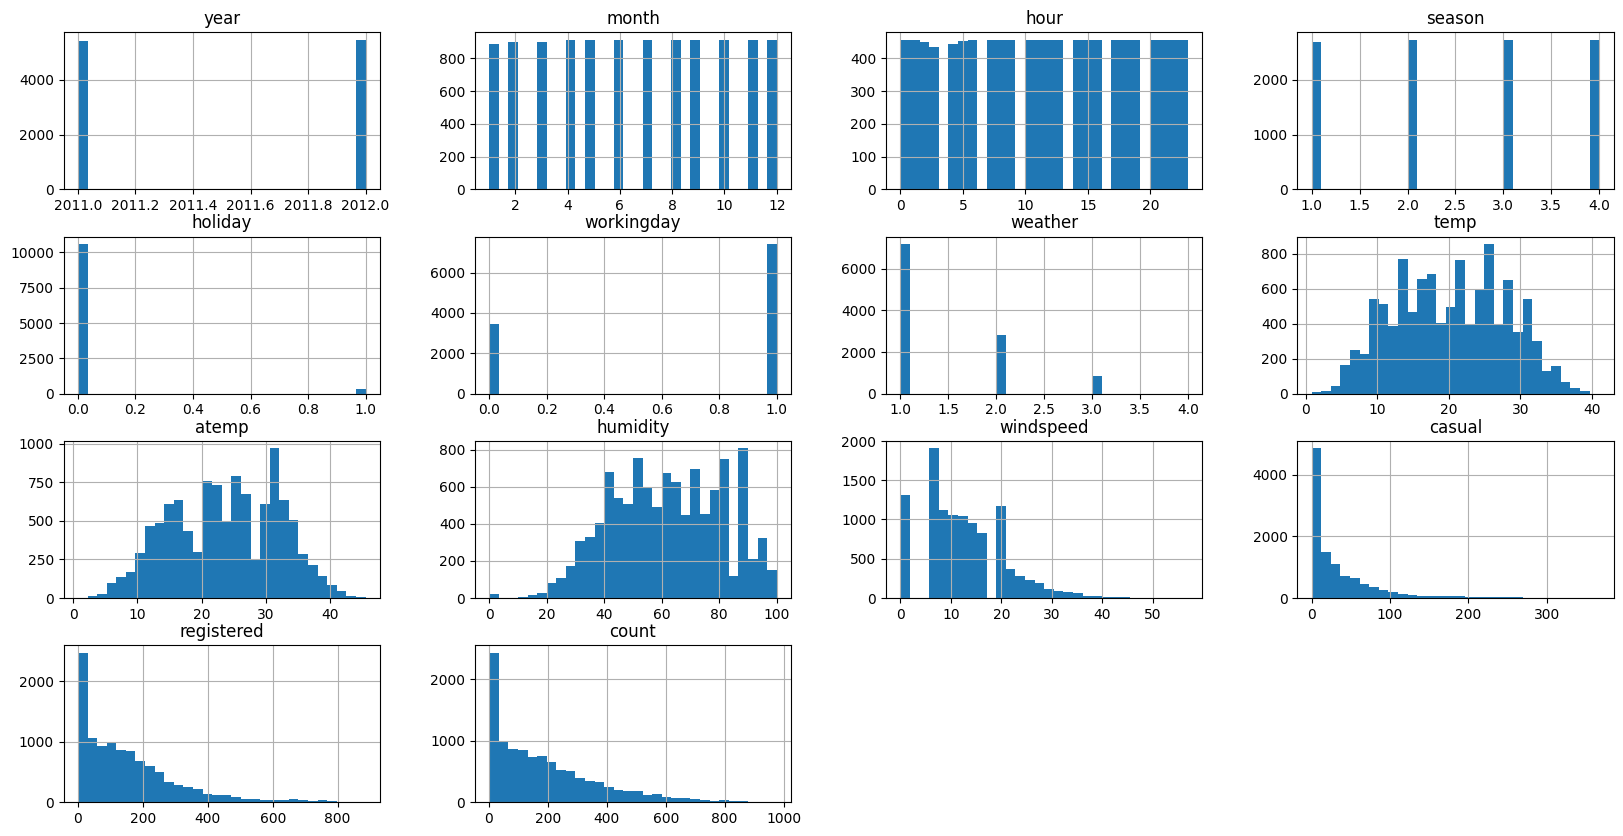

In [17]:
train_df.hist(bins=30, figsize=(20, 10))
plt.show()

In [18]:
#show total by  year
train_df[['year','count']].groupby('year').sum().reset_index()

,year,count
0,2011,781979
1,2012,1303497


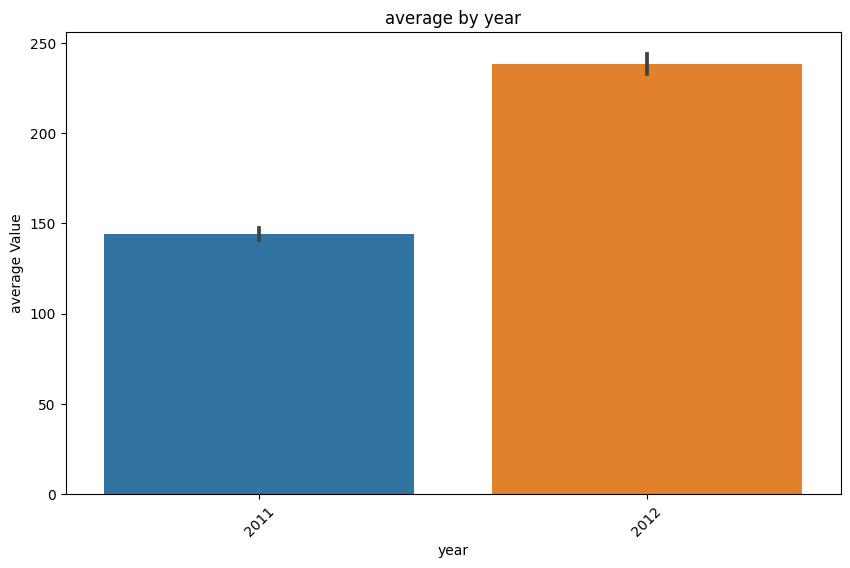

In [19]:
#show average by year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='count', data=train_df)
plt.title('average by year')
plt.xlabel('year')
plt.ylabel('average Value')
plt.xticks(rotation=45)
plt.show()

In [20]:
# show total by  month in desc 
train_df[['month','count']].groupby('month').sum().reset_index().sort_values(

    by='count',ascending=False,ignore_index=True
)

,month,count
0,6,220733
1,7,214617
2,8,213516
3,9,212529
4,10,207434
5,5,200147
6,11,176440
7,4,167402
8,12,160160
9,3,133501


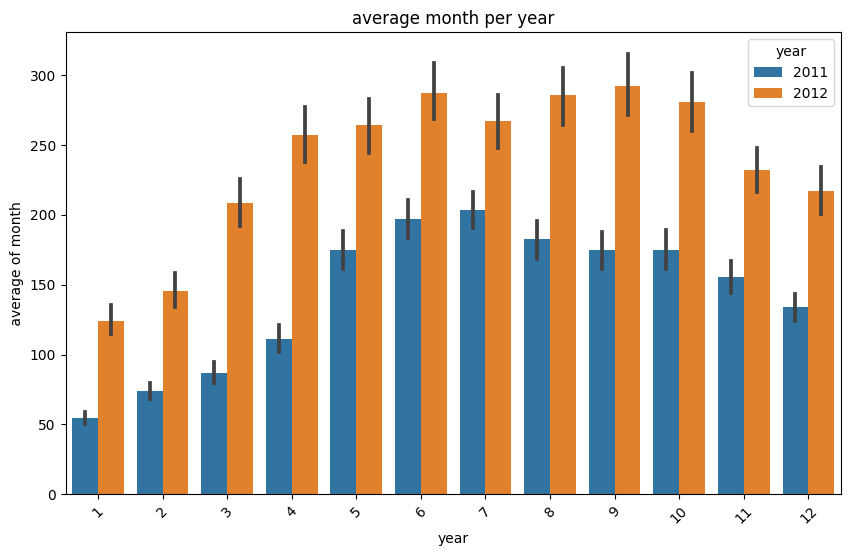

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=train_df,hue='year')
plt.title('average month per year')
plt.xlabel('year')
plt.ylabel(' average of month ')
plt.xticks(rotation=45)
plt.show()

In [22]:
#show total through year
train_df[['season', 'count']].groupby('season').sum().reset_index().sort_values(

    by='count', ascending=False,ignore_index=True
    
    )

,season,count
0,3,640662
1,2,588282
2,4,544034
3,1,312498


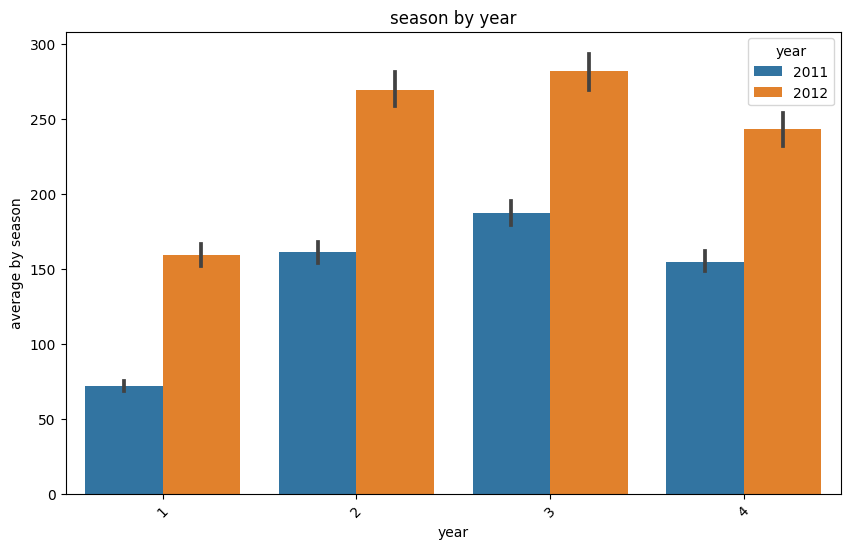

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=train_df,hue='year')
plt.title('season by year')
plt.xlabel('year')
plt.ylabel('average by season')
plt.xticks(rotation=45)
plt.show()

In [24]:
train_df[['custom_hour', 'count']].groupby('custom_hour').sum().reset_index().sort_values(by='count', ascending=False,ignore_index=True)

,custom_hour,count
0,afternoon,819512
1,night,584411
2,morning,573160
3,overnight,108393


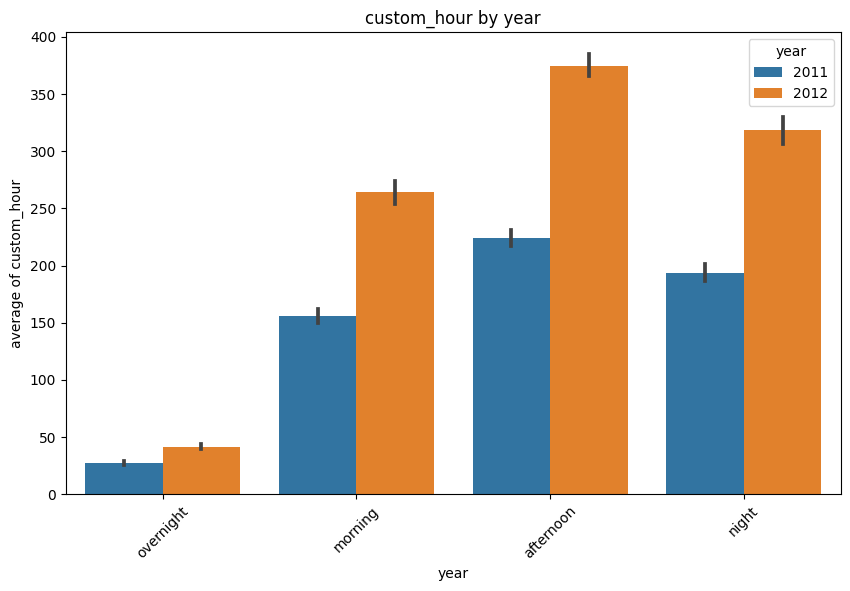

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='custom_hour', y='count', data=train_df,hue='year')
plt.title('custom_hour by year')
plt.xlabel('year')
plt.ylabel('average of custom_hour')
plt.xticks(rotation=45)
plt.show()

g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


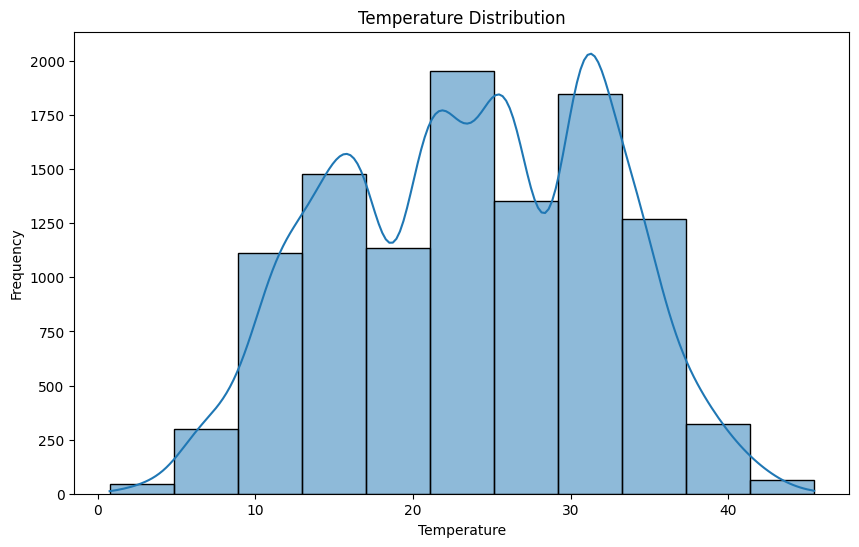

In [26]:
# Example with your own data
plt.figure(figsize=(10, 6))
sns.histplot(x='atemp', bins=11, kde=True,data=train_df)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


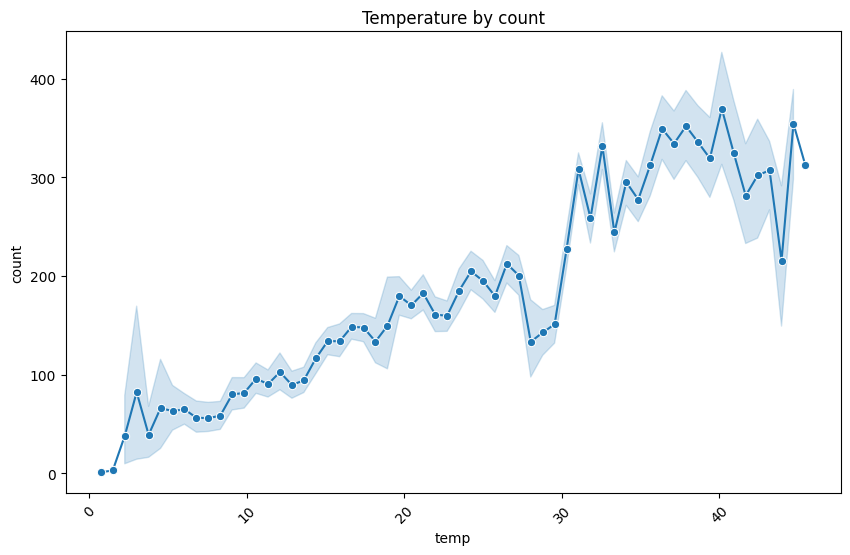

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='atemp', y='count', data=train_df, marker='o')
plt.title('Temperature by count')
plt.xlabel('temp')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [28]:
t=train_df[['weather','count']].groupby('weather').sum().reset_index().sort_values(
    by='count',ascending=False)
t

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
g:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


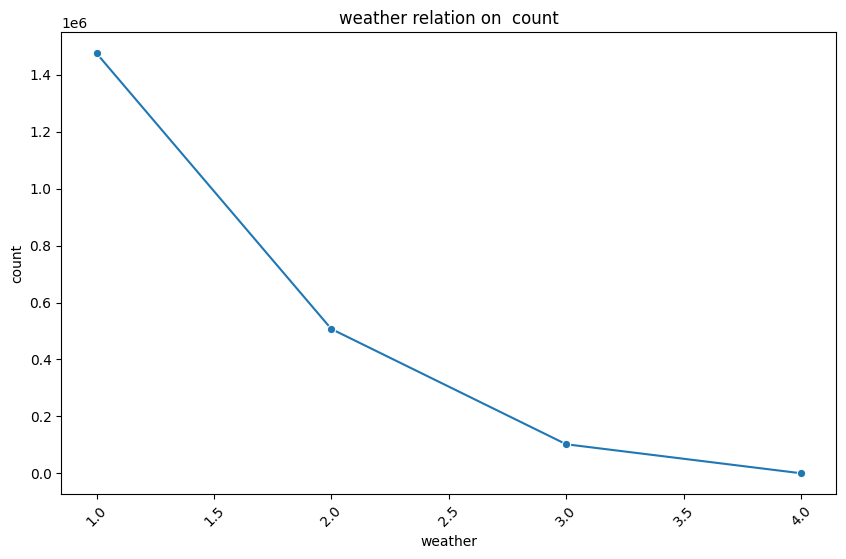

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weather', y='count', data=t, marker='o')
plt.title('weather relation on  count')
plt.xlabel('weather')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

#### prepare data

In [30]:
train_df.drop(['month','hour','temp'],axis=1,inplace=True)

C:\Users\2B'\AppData\Local\Temp\ipykernel_11652\959794144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['month','hour','temp'],axis=1,inplace=True)


In [31]:
num_col = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categ_col = train_df.select_dtypes(include=['object']).columns.tolist()
if 'count' in num_col:
    num_col.remove('count')

In [32]:
# Create transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('encoder', OrdinalEncoder())  # Ordinal encode categorical features
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, categ_col)
    ])

X = train_df.drop('count', axis=1)
y = train_df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=3,random_state=42,
                                                      criterion='absolute_error'),
    'Random Forest bagging': RandomForestRegressor(n_estimators=1,bootstrap=True,max_depth=3
                                                      ,criterion='squared_error'),

    'Random Forest pasting': RandomForestRegressor(n_estimators=1,bootstrap=False,max_depth=3
                                                      ,criterion='squared_error'),

    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=15),

    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.2)
}

# Evaluate each model
for name, model in models.items():
    # Create and fit the pipeline
    pipeline = Pipeline(steps=[
        ('regressor', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train_transformed, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test_transformed)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} R^2 Score: {r2:.3f}")

Linear Regression R^2 Score: 1.000
Decision Tree Regression R^2 Score: 0.926
Random Forest bagging R^2 Score: 0.927
Random Forest pasting R^2 Score: 0.931
Gradient Boosting Regression R^2 Score: 0.939
Support Vector Regression R^2 Score: 0.877
